In [3]:
from pandas import read_csv
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

In [4]:
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/gustavoteixeirah/ELT575-Aprendizado-Profundo/main/tesla_stock_2015_2022%20(4).csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [ ]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)

Epoch 1/20
109/109 - 2s - loss: 0.0017 - val_loss: 0.0457 - 2s/epoch - 17ms/step
Epoch 2/20
109/109 - 0s - loss: 2.6589e-04 - val_loss: 0.0032 - 330ms/epoch - 3ms/step
Epoch 3/20
109/109 - 0s - loss: 6.9336e-05 - val_loss: 0.0060 - 317ms/epoch - 3ms/step
Epoch 4/20
109/109 - 0s - loss: 1.4962e-04 - val_loss: 0.0026 - 356ms/epoch - 3ms/step
Epoch 5/20
109/109 - 0s - loss: 1.2261e-04 - val_loss: 0.0026 - 326ms/epoch - 3ms/step
Epoch 6/20
109/109 - 0s - loss: 1.2943e-04 - val_loss: 0.0107 - 339ms/epoch - 3ms/step
Epoch 7/20
109/109 - 0s - loss: 6.7226e-05 - val_loss: 0.0027 - 351ms/epoch - 3ms/step
Epoch 8/20
109/109 - 0s - loss: 6.5185e-05 - val_loss: 0.0038 - 345ms/epoch - 3ms/step
Epoch 9/20
109/109 - 0s - loss: 7.6727e-05 - val_loss: 0.0101 - 350ms/epoch - 3ms/step
Epoch 10/20
109/109 - 0s - loss: 9.7440e-05 - val_loss: 0.0025 - 352ms/epoch - 3ms/step
Epoch 11/20
109/109 - 0s - loss: 6.3154e-05 - val_loss: 0.0027 - 367ms/epoch - 3ms/step
Epoch 12/20
109/109 - 0s - loss: 5.9005e-05 - v

## Inicie com uma única camada LSTM, como no exemplo original, mas com 50 unidades ocultas. Reporte o resultado como feito no exemplo (Raíz do Erro Médio Quadrático e plot de valores das ações vs. valores previstos)

In [ ]:
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Raíz do Erro Médio Quadrático para Treino: %.3f' % (train_rmse))
    print('Raíz do Erro Médio Quadrático para Teste: %.3f' % (test_rmse))

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print("REPORTE DO RESULTADO: ")
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

1/1 [==============================] - 0s 16ms/step
REPORTE DO RESULTADO: 
Raíz do Erro Médio Quadrático para Treino: 0.005
Raíz do Erro Médio Quadrático para Teste: 0.057


## Plot de valores das ações vs. valores previstos

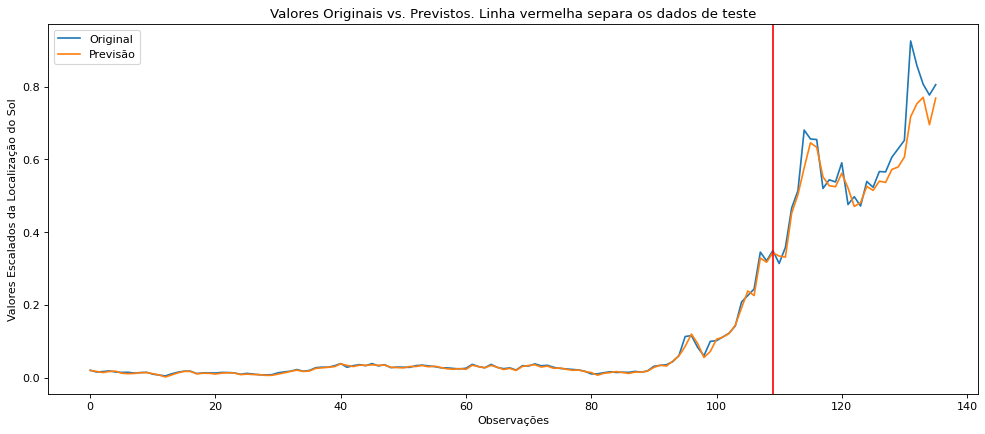

In [ ]:
# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Original', 'Previsão'])
    plt.xlabel('Observações')
    plt.ylabel('Valores Escalados da Localização do Sol')
    plt.title('Valores Originais vs. Previstos. Linha vermelha separa os dados de teste')
plot_result(trainY, testY, train_predict, test_predict)

## Experimente adicionar mais uma camada LSTM após a primeira (mesmo número de unidades ocultas do item anterior).

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0], return_sequences=True))
    model.add(LSTM(hidden_units, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)

Epoch 1/20
109/109 - 4s - loss: 8.5567e-04 - val_loss: 0.0059 - 4s/epoch - 35ms/step
Epoch 2/20
109/109 - 1s - loss: 9.4442e-05 - val_loss: 0.0034 - 568ms/epoch - 5ms/step
Epoch 3/20
109/109 - 1s - loss: 1.9870e-04 - val_loss: 0.0450 - 528ms/epoch - 5ms/step
Epoch 4/20
109/109 - 1s - loss: 2.1697e-04 - val_loss: 0.0043 - 551ms/epoch - 5ms/step
Epoch 5/20
109/109 - 1s - loss: 1.7625e-04 - val_loss: 0.0033 - 535ms/epoch - 5ms/step
Epoch 6/20
109/109 - 1s - loss: 2.1163e-04 - val_loss: 0.0069 - 546ms/epoch - 5ms/step
Epoch 7/20
109/109 - 1s - loss: 3.5321e-04 - val_loss: 0.0335 - 525ms/epoch - 5ms/step
Epoch 8/20
109/109 - 1s - loss: 1.2829e-04 - val_loss: 0.0030 - 538ms/epoch - 5ms/step
Epoch 9/20
109/109 - 1s - loss: 9.7858e-05 - val_loss: 0.0058 - 508ms/epoch - 5ms/step
Epoch 10/20
109/109 - 1s - loss: 7.9254e-05 - val_loss: 0.0062 - 513ms/epoch - 5ms/step
Epoch 11/20
109/109 - 1s - loss: 1.2151e-04 - val_loss: 0.0037 - 555ms/epoch - 5ms/step
Epoch 12/20
109/109 - 1s - loss: 1.0652e-04

In [ ]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print("REPORTE DO RESULTADO: ")
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

1/1 [==============================] - 0s 22ms/step
REPORTE DO RESULTADO: 
Raíz do Erro Médio Quadrático para Treino: 0.014
Raíz do Erro Médio Quadrático para Teste: 0.132


## Aqui ja percebe-se uma melhora em relacao ao resultado anterior.

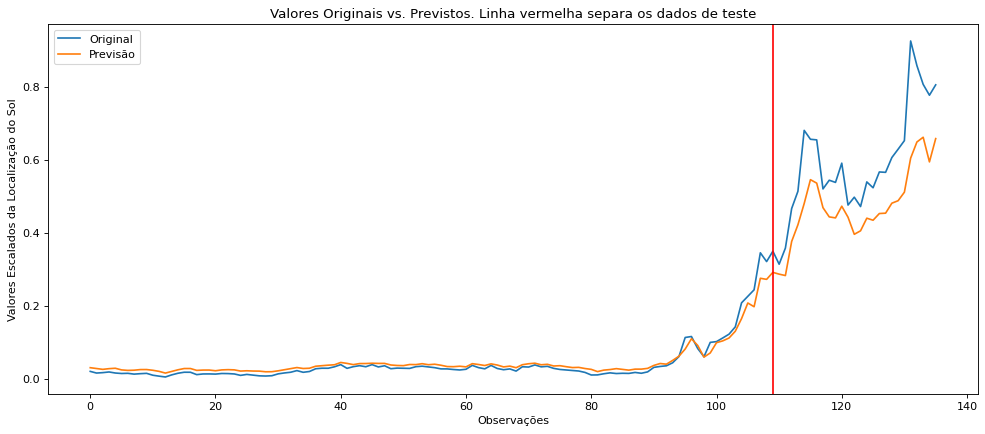

In [ ]:
# Plot the result
plot_result(trainY, testY, train_predict, test_predict)

# Adicione um Dropout de 20% após cada camada LSTM e reporte se houve melhora.


In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, activation=activation[0]))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps, 1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)


Epoch 1/20
109/109 - 3s - loss: 8.5450e-04 - val_loss: 0.0064 - 3s/epoch - 31ms/step
Epoch 2/20
109/109 - 1s - loss: 2.9717e-04 - val_loss: 0.0033 - 602ms/epoch - 6ms/step
Epoch 3/20
109/109 - 1s - loss: 1.8115e-04 - val_loss: 0.0168 - 574ms/epoch - 5ms/step
Epoch 4/20
109/109 - 1s - loss: 1.8983e-04 - val_loss: 0.0031 - 587ms/epoch - 5ms/step
Epoch 5/20
109/109 - 1s - loss: 5.0866e-04 - val_loss: 0.0070 - 560ms/epoch - 5ms/step
Epoch 6/20
109/109 - 1s - loss: 4.6747e-04 - val_loss: 0.1249 - 588ms/epoch - 5ms/step
Epoch 7/20
109/109 - 1s - loss: 7.4828e-04 - val_loss: 0.0051 - 585ms/epoch - 5ms/step
Epoch 8/20
109/109 - 1s - loss: 1.4638e-04 - val_loss: 0.0035 - 566ms/epoch - 5ms/step
Epoch 9/20
109/109 - 1s - loss: 2.9696e-04 - val_loss: 0.0165 - 542ms/epoch - 5ms/step
Epoch 10/20
109/109 - 1s - loss: 4.1699e-04 - val_loss: 0.0040 - 594ms/epoch - 5ms/step
Epoch 11/20
109/109 - 1s - loss: 2.2358e-04 - val_loss: 0.0027 - 559ms/epoch - 5ms/step
Epoch 12/20
109/109 - 1s - loss: 1.2058e-04

In [ ]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print("REPORTE DO RESULTADO: ")
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

1/1 [==============================] - 0s 17ms/step
REPORTE DO RESULTADO: 
Raíz do Erro Médio Quadrático para Treino: 0.006
Raíz do Erro Médio Quadrático para Teste: 0.057


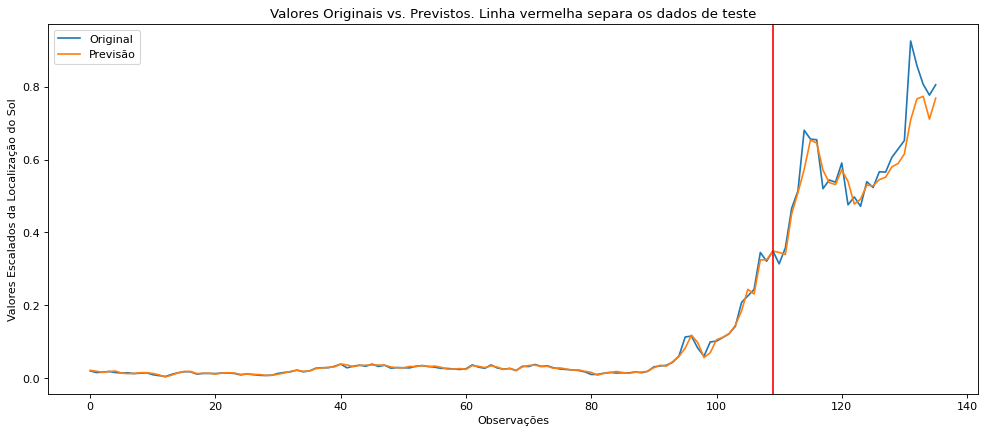

In [ ]:
# Plot the result
plot_result(trainY, testY, train_predict, test_predict)

In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0], return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(hidden_units, input_shape=input_shape,
                   activation=activation[0]))
    model.add(Dropout(0.2))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

model = create_RNN(hidden_units=50, dense_units=1, input_shape=(time_steps, 1),
                   activation=['tanh', 'tanh'])
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=1, verbose=2)


Epoch 1/20
109/109 - 7s - loss: 0.0016 - val_loss: 0.0245 - 7s/epoch - 61ms/step
Epoch 2/20
109/109 - 1s - loss: 0.0012 - val_loss: 0.2639 - 1s/epoch - 9ms/step
Epoch 3/20
109/109 - 1s - loss: 0.0015 - val_loss: 0.0252 - 976ms/epoch - 9ms/step
Epoch 4/20
109/109 - 1s - loss: 6.8093e-04 - val_loss: 0.1233 - 1s/epoch - 10ms/step
Epoch 5/20
109/109 - 1s - loss: 4.5057e-04 - val_loss: 0.0064 - 1s/epoch - 9ms/step
Epoch 6/20
109/109 - 1s - loss: 7.0800e-04 - val_loss: 0.0183 - 1s/epoch - 9ms/step
Epoch 7/20
109/109 - 1s - loss: 5.0923e-04 - val_loss: 0.0086 - 921ms/epoch - 8ms/step
Epoch 8/20
109/109 - 1s - loss: 0.0012 - val_loss: 0.1137 - 988ms/epoch - 9ms/step
Epoch 9/20
109/109 - 1s - loss: 6.5529e-04 - val_loss: 0.1189 - 1s/epoch - 9ms/step
Epoch 10/20
109/109 - 1s - loss: 6.6570e-04 - val_loss: 0.0288 - 1s/epoch - 11ms/step
Epoch 11/20
109/109 - 2s - loss: 2.0524e-04 - val_loss: 0.0189 - 2s/epoch - 14ms/step
Epoch 12/20
109/109 - 2s - loss: 2.6374e-04 - val_loss: 0.0186 - 2s/epoch - 1

In [ ]:
# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
print("REPORTE DO RESULTADO: ")
# Mean square error
print_error(trainY, testY, train_predict, test_predict)

1/1 [==============================] - 0s 28ms/step
REPORTE DO RESULTADO: 
Raíz do Erro Médio Quadrático para Treino: 0.013
Raíz do Erro Médio Quadrático para Teste: 0.102


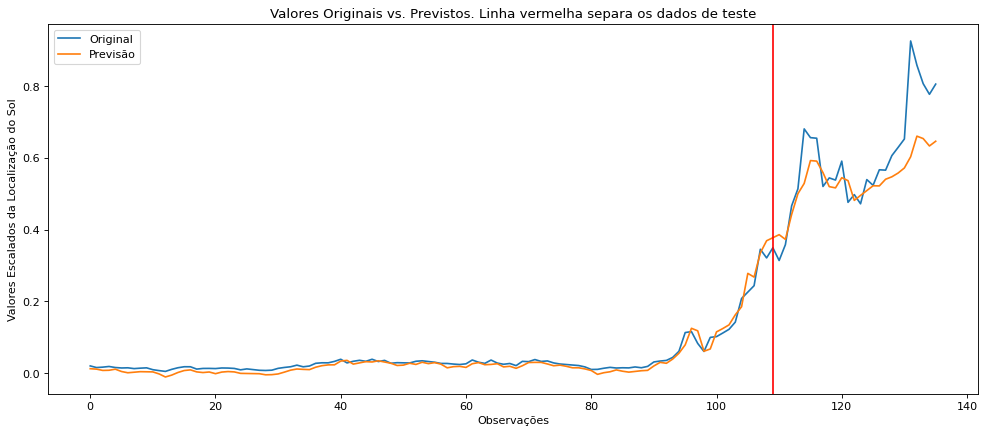

In [ ]:
# Plot the result
plot_result(trainY, testY, train_predict, test_predict)

## O resultado parece que foi muito denegrido com as alteracoes feitas no modelo, em relacao ao primeiro. Os mean square errors foram:

2) Raíz do Erro Médio Quadrático para Treino: 0.005
Raíz do Erro Médio Quadrático para Teste: 0.057

3) Raíz do Erro Médio Quadrático para Treino: 0.014
Raíz do Erro Médio Quadrático para Teste: 0.132

4) Raíz do Erro Médio Quadrático para Treino: 0.013
Raíz do Erro Médio Quadrático para Teste: 0.102


## Ha muito pouco dados para tantas camadas LSTM